In [2]:
import numpy as np
import matplotlib.pylab as plt
import cmath

In [3]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*35.6*10**(-5)*y_pos)/(wave_length)))**2

In [11]:
def Feynman_integral(N,lim_z,rendijas="Two",a=1.0*10**(-4),Lam=530*10**(-9),d=35.6*10**(-5),D_1=1.,D_2=1.):
    #N es el número de puntos que se quiere hacer y lim_z es el rango en donde se quiere ver la difracción
    lim_x=a*0.5
    if rendijas=="Two":
        y=np.linspace(-0.5*d-0.5*a,-0.5*d+0.5*a)
        y=np.append(y,np.linspace(0.5*d-a*0.5,0.5*d+a*0.5))
        I_z=[]
        for i_z in range(N+1):
            delta_z=2.0*lim_z/N
            z=delta_z*i_z-lim_z
            integral=0.0
            for i_x in range(N+1):
                    delta_x=2.0*lim_x/N
                    x=delta_x*i_x-lim_x
                    exponential_2=np.exp(np.pi*1j*(x-y)**2/(D_1*Lam))
                    exponential_3=np.exp(np.pi*1j*(y-z)**2/(D_2*Lam))
                    integral += np.trapz(exponential_2*exponential_3,y)*delta_x
            integral=np.sqrt(integral.conjugate()*integral).real
            I_z.append(integral)
        I_z=np.array(I_z)
        return I_z/np.max(I_z)
    elif rendijas=="One":
        y=np.linspace(-0.5*d-0.5*a,-0.5*d+a*0.5)
        I_z=[]
        for i_z in range(N+1):
            delta_z=2.0*lim_z/N
            z=delta_z*i_z-lim_z
            integral=0.0
            for i_x in range(N+1):
                    delta_x=2.0*lim_x/N
                    x=delta_x*i_x-lim_x
                    exponential_2=np.exp(np.pi*1j*(x-y)**2/(D_1*Lam))
                    exponential_3=np.exp(np.pi*1j*(y-z)**2/(D_2*Lam))
                    integral += np.trapz(exponential_2*exponential_3,y)*delta_x
            integral=np.sqrt(integral.conjugate()*integral).real
            I_z.append(integral)
        I_z=np.array(I_z)
        return I_z/np.max(I_z)

In [12]:
Intensidad_dos=Feynman_integral(500,0.005,rendijas="Two")
Intensidad_una=Feynman_integral(500,0.005,rendijas="One")

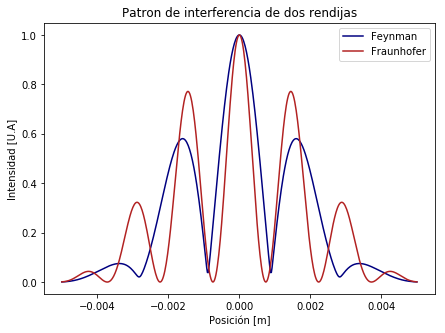

In [13]:
plt.figure(figsize=(7,5))
y_f=np.linspace(-5./1000,5./1000,len(Intensidad_dos))
y_f[np.argmin(np.abs(y_f))]=1E-7
wave_length=530*10**(-9)
plt.plot(y_f,Intensidad_dos*Intensidad_difraccion(function_alpha(y_f,wave_length)),color="navy",label="Feynman")
plt.plot(y_f,Intensidad_interferencia(y_f,wave_length)*Intensidad_difraccion(function_alpha(y_f,wave_length)),color="firebrick", label="Fraunhofer")
plt.xlabel("Posición [m]")
plt.ylabel("Intensidad [U.A]")
plt.title("Patron de interferencia de dos rendijas")
plt.legend()
plt.savefig("./Figuras/Feynman_dosrendijas.png")
plt.show()

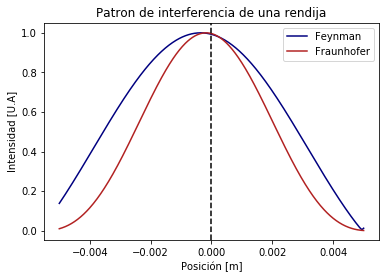

In [27]:
a=1.0*10**(-4)
d=35.6*10**(-5)
plt.figure(figsize=(6,4))
y_f=np.linspace(-5/1000,5/1000,len(Intensidad_dos))
y_f[np.argmin(np.abs(y_f))]=1E-7
plt.plot(y_f,Intensidad_una,color="navy",label="Feynman")
plt.plot(y_f,Intensidad_difraccion(function_alpha(y_f+0.5*d,wave_length)),color="firebrick", label="Fraunhofer")
plt.xlabel("Posición [m]")
plt.ylabel("Intensidad [U.A]")
plt.title("Patron de interferencia de una rendija")
plt.legend()
plt.axvline(x=0.0, color='k', linestyle='--')
plt.savefig("./Figuras/Feynman_unarendija.png")
plt.show()